Imports

In [1]:
#Some useful modules
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

#Modules to configure GPU usage
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

#Module to generate the images of the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Modules necessary to implement and train the CNN
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model

#Module to preprocess images
from tensorflow.keras.preprocessing import image

Some Config

In [2]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

Pre-Processing Data

Setting Categories

In [55]:
categories = ['SRN('+str(i)+')' for i in range(1, 58)]

In [56]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        # "./training_set/training_set/",
        "../Dataset/Images/",
        target_size = (64, 64),
        batch_size = 32,
        class_mode = "categorical",
        classes = categories
      )

Found 5785 images belonging to 57 classes.


In [57]:
datagen1 = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_set = datagen1.flow_from_directory(
        # "./training_set/training_set/",
        "../Dataset/Images/",
        target_size = (64, 64),
        batch_size = 32,
        class_mode = "categorical",
        classes = categories
      )

Found 5785 images belonging to 57 classes.


CNN Model

In [59]:
cnn = tf.keras.models.Sequential()
#First Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
#Pooling the layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#Second Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#Flattening the inputs
cnn.add(tf.keras.layers.Flatten())
#Connecting the layers
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#Output layer
cnn.add(Dense(57, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
#Summary of the model
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

Training the CNN

In [60]:
#Compiling
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Fitting the model
model=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
181/181 [==============================] - 41s 222ms/step - loss: 3.7563 - accuracy: 0.1409 - val_loss: 2.2939 - val_accuracy: 0.4097
Epoch 2/10
181/181 [==============================] - 34s 185ms/step - loss: 1.6506 - accuracy: 0.5734 - val_loss: 1.1141 - val_accuracy: 0.7264
Epoch 3/10
181/181 [==============================] - 47s 262ms/step - loss: 0.9456 - accuracy: 0.7736 - val_loss: 0.8001 - val_accuracy: 0.8143
Epoch 4/10
181/181 [==============================] - 37s 206ms/step - loss: 0.6409 - accuracy: 0.8595 - val_loss: 0.5653 - val_accuracy: 0.8823
Epoch 5/10
181/181 [==============================] - 39s 216ms/step - loss: 0.4674 - accuracy: 0.9127 - val_loss: 0.3870 - val_accuracy: 0.9336
Epoch 6/10
181/181 [==============================] - 42s 230ms/step - loss: 0.3725 - accuracy: 0.9371 - val_loss: 0.2939 - val_accuracy: 0.9627
Epoch 7/10
181/181 [==============================] - 40s 221ms/step - loss: 0.3008 - accuracy: 0.9604 - val_loss: 0.3076 - val_ac

Plotting the train_loss, validation_loss, train_accuracy, validation_accuracy

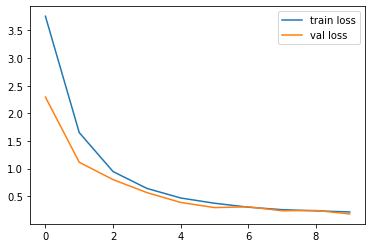

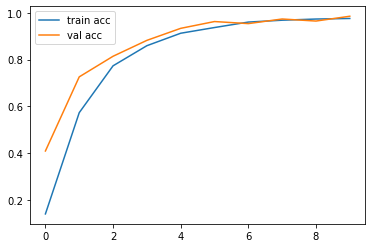

In [61]:
import matplotlib.pyplot as plt
plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

Saving the model

In [62]:
cnn.save('./model_sign_classifier_58.h5')